HOUSE PRICE PREDICTIONS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,recall_score,f1_score,roc_auc_score,precision_score,confusion_matrix,classification_report
from sklearn import preprocessing

In [2]:
train=pd.read_csv('/content/BHP.csv')
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


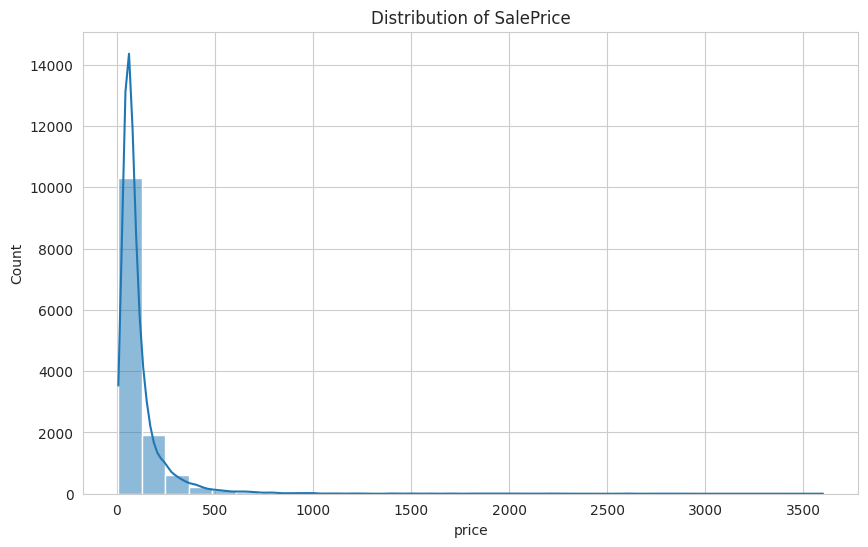

In [4]:
import seaborn as sns
sns.set_style('whitegrid')
# Visualize the distribution of 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train['price'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.show()

In [5]:
train.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [6]:
train.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


PERFORMING EDA

In [7]:
train.shape

(13320, 9)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<ipython-input-9-7259f6454f0d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'],color='red',bins= 50, hist_kws={'alpha': .4})


<Axes: xlabel='price', ylabel='Density'>

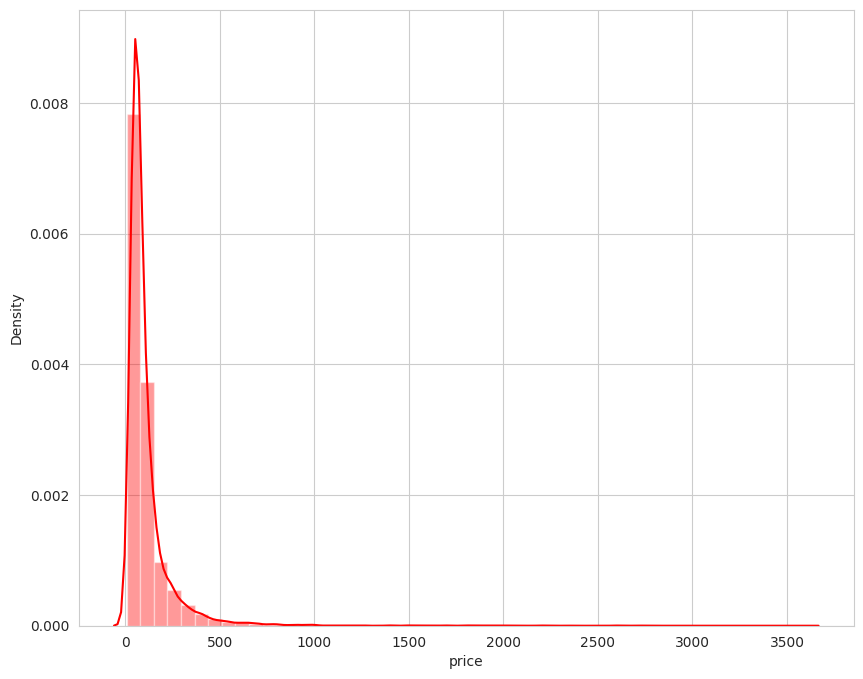

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(train['price'],color='red',bins= 50, hist_kws={'alpha': .4})

<ipython-input-10-a65bc2b1d6ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

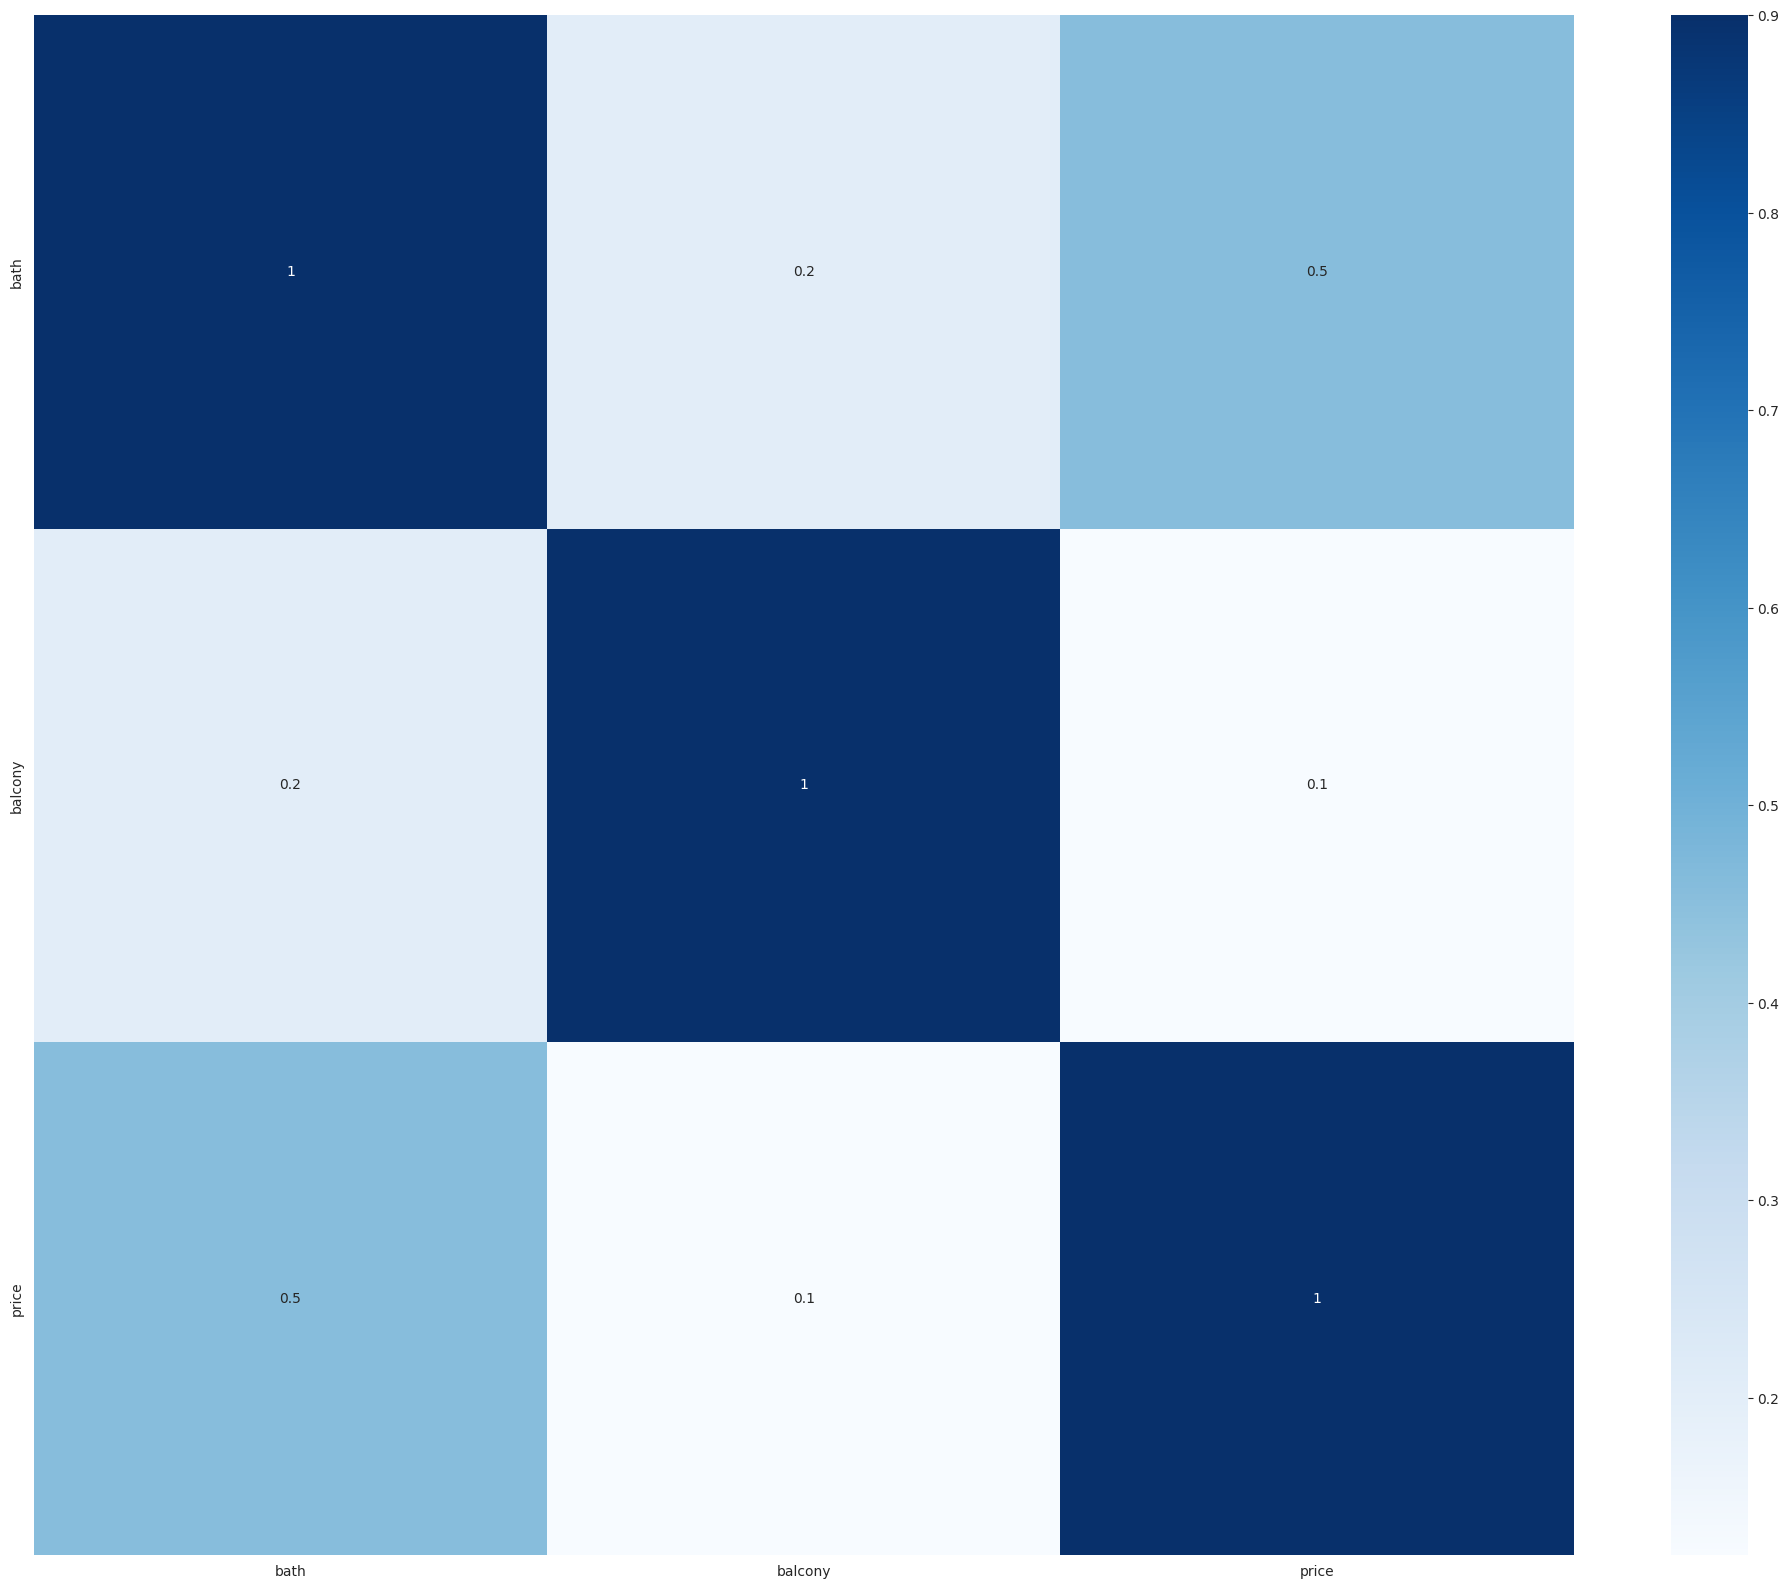

In [10]:
corr = train.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corr, vmax=0.9, cmap="Blues",fmt = '.1g', annot=True, square=True)

In [11]:
def clean_data(df):
    cols = list(df.columns)
    null_list = list(df.isna().sum())
    null_list = [x/1460 for x in null_list]
    for i in range(len(null_list)):
        if null_list[i]>=0.75:
            df.drop(cols[i],axis = 1,inplace = True)

In [12]:
clean_data(train)

In [13]:
train.shape

(13320, 8)

In [14]:
print(list(train.columns))

['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath', 'balcony', 'price']


In [15]:
def remove_null(df):
    num_col = []
    cat_col = []
    for i in df.columns:
        if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
            num_col.append(i)
        else:
            cat_col.append(i)
    for i in num_col:
        df[i].fillna(df[i].median(),inplace =True)

    df.fillna("NoResult",inplace=True)

In [16]:
remove_null(train)

In [17]:
print(list(train.isna().sum()),end=' ')

[0, 0, 0, 0, 0, 0, 0, 0] 

In [18]:
cat_col = [x for x in train.columns if train[x].dtypes == 'object' ]
len(cat_col)

5

Mean of Price: 113.0
Median of Price: 72.0
Mode of Price: 75.0


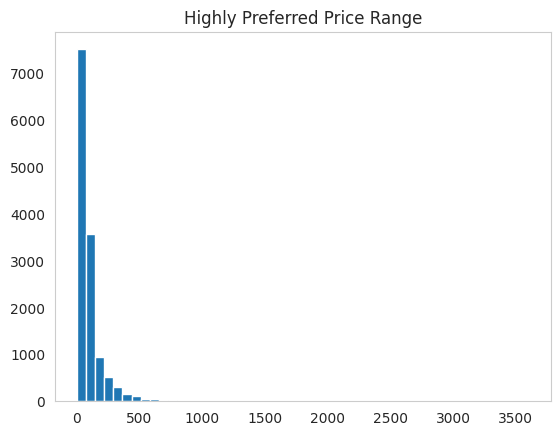

In [19]:
print("Mean of Price:", round(train["price"].mean(numeric_only=True), 0))
print("Median of Price:", train["price"].median(numeric_only=True))
print("Mode of Price:", train["price"].mode()[0])

train["price"].hist(bins=50, grid=False)
plt.title("Highly Preferred Price Range");

In [20]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for col in cat_col:
    train[col]= label_encoder.fit_transform(train[col])

In [21]:
train.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,40,419,13,70,2.0,1.0,39.07
1,2,80,317,19,1288,5.0,3.0,120.00
2,0,80,1180,16,514,2.0,3.0,62.00
3,3,80,757,16,602,3.0,1.0,95.00
4,3,80,716,13,239,2.0,1.0,51.00


In [22]:
train.shape

(13320, 8)

In [24]:
x = train.drop("price",axis=1)
y = train['price']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,shuffle = True,random_state = 42)

In [26]:
x_train

,area_type,availability,location,size,total_sqft,bath,balcony
7172,3,80,522,16,1191,4.0,2.0
9150,3,68,1262,0,1862,1.0,1.0
5153,1,80,1209,13,158,2.0,1.0
11894,2,80,1039,17,577,5.0,2.0
5727,3,80,664,16,574,3.0,2.0
...,...,...,...,...,...,...,...
11964,2,80,1189,22,239,4.0,1.0
5191,3,69,707,16,642,3.0,2.0
5390,3,80,443,13,74,2.0,1.0
860,2,80,973,24,239,4.0,2.0


In [27]:
y_train

7172     175.00
9150      36.23
5153      52.00
11894     95.00
5727      95.00
          ...  
11964     99.00
5191     120.00
5390      48.50
860      125.00
7270      90.00
Name: price, Length: 11322, dtype: float64

In [28]:
x_test

,area_type,availability,location,size,total_sqft,bath,balcony
8077,0,80,212,14,62,2.0,1.0
1602,3,80,987,16,779,3.0,1.0
10498,0,80,513,13,119,2.0,1.0
3297,2,80,832,24,239,4.0,2.0
8893,0,26,336,19,1224,3.0,1.0
...,...,...,...,...,...,...,...
4832,3,80,799,0,1930,1.0,1.0
1606,0,80,356,16,686,3.0,0.0
10410,2,80,1268,22,789,5.0,2.0
8744,2,80,486,19,1208,4.0,1.0


In [29]:
y_test

8077      64.8
1602     125.0
10498     60.0
3297     110.0
8893     210.0
         ...  
4832      55.0
1606      80.0
10410    300.0
8744     650.0
12064     45.0
Name: price, Length: 1998, dtype: float64

FINAL MODELS ON THE TESTING DATA

In [30]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'SVR':SVR()
}

In [31]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    ytrainpred = model.predict(x_train)
    ytestpred = model.predict(x_test)
    model_train_r2_score= r2_score(y_train,ytrainpred)
    ## Test performances
#     model_test_accuracy = accuracy_score(y_test,ytestpred)
#     model_test_f1 = f1_score(y_test,ytestpred)
#     model_test_precision=precision_score(y_test,ytestpred)
#     model_test_recall = recall_score(y_train,ytrainpred)
#     model_test_roauc_score= roc_auc_score(y_test,ytestpred)
    model_test_r2_score= r2_score(y_test,ytestpred)

    print(list(models.keys())[i])
    print(model_train_r2_score)
    print(model_test_r2_score)
    print()
    print("----------------------------------------------------------")

LinearRegression
0.23442418806333454
0.254444851929273

----------------------------------------------------------
Lasso
0.23430478573102576
0.2567443633057077

----------------------------------------------------------
DecisionTreeRegressor
0.9994701738521251
-0.01897375406738644

----------------------------------------------------------
RandomForestRegressor
0.928586334490634
0.49698953407996194

----------------------------------------------------------
SVR
0.0735437121110537
0.09891177859795408

----------------------------------------------------------


 CONCLUSION

By comparing different machine learning models based on r2 score it is found that Random Forest Model works best for this dataset.